In [16]:
 # Import Python libaries
%matplotlib inline
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams

import seaborn as sns
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
#from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# Machine learning & model visualization tools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
#import pydot
import math
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from keras import backend as BK
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#from bioinfokit.analys import stat
#from sklearn.inspection import partial_dependence, plot_partial_dependence

#from progressbar import ProgressBar
#pbar = ProgressBar()

global_split_rand = 2571

Text(0.5, 0, '!!!Ariaaaal')

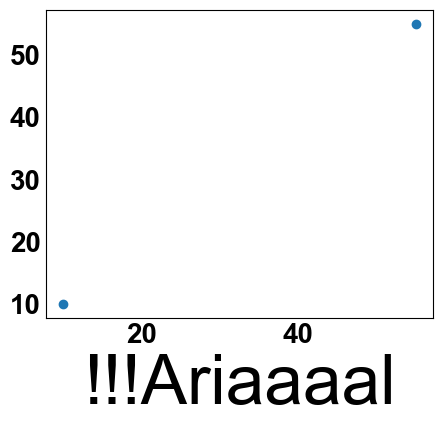

In [17]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

# Fix the samples that rounding resulted in negative values for the last one.
 #97:  [ 0.31	0.09	0.20	0.40	0.01	-1.000000e-02 generated one]
 real one: [0.30701378 0.08708877 0.19961717 0.39865702 0.00716017]
 evaluated one:  [0.31 0.09 0.2 0.4 0.0 0.0]

In [18]:
# Fix the samples that rounding resulted in 
df_eval = pd.read_csv('new_evaluated.csv',)

df_init = pd.read_csv('Yuchao_20220816.csv',)
df_eval ['sample'] = list(range(len(df_init)+1, len(df_init) + len(df_eval) + 1))

df_eval['R6(IBOA)'].loc[df_eval['sample']==97] = 0.0
df_eval['R5(HEAA)'].loc[df_eval['sample']==97] = 0.0
df_eval ['Toughness'] = -df_eval ['Toughness']
df_eval ['Strength'] = -df_eval ['Strength']
#df_eval.rename(columns={"A": "a", "B": "c"})
#print (df_eval)

/tmp/ipykernel_33340/779701272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['R6(IBOA)'].loc[df_eval['sample']==97] = 0.0
/tmp/ipykernel_33340/779701272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['R5(HEAA)'].loc[df_eval['sample']==97] = 0.0


In [19]:
cols = df_eval.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_eval = df_eval [cols]
r6 = round(1-df_eval['R1(HA)'] -df_eval['R2(IA)'] -df_eval['R3(NVP)']  -df_eval['R4(AA)'] -df_eval['R5(HEAA)'], 2)
df_eval ["R6(IBOA)"] = r6
df_eval ['sum'] = df_eval ['R1(HA)']+\
                 df_eval ['R2(IA)']+\
            df_eval ['R3(NVP)']+\
           df_eval ['R4(AA)']+\
                df_eval['R5(HEAA)']  +\
                  df_eval['R6(IBOA)'] 

In [20]:
x_eval = df_eval.iloc[:, 1:6]
x_init = df_init.iloc[:, 1:6]

df = pd.concat([df_init, df_eval], axis=0)
X = df.iloc[:, 1:6]

In [21]:
df.iloc[:, 1:6]

,R1(HA),R2(IA),R3(NVP),R4(AA),R5(HEAA)
0,0.15,0.20,0.02,0.21,0.18
1,0.25,0.31,0.11,0.02,0.16
2,0.06,0.17,0.27,0.11,0.27
3,0.00,0.10,0.30,0.20,0.20
4,0.35,0.35,0.00,0.00,0.10
...,...,...,...,...,...
57,0.46,0.13,0.12,0.05,0.00
58,0.35,0.23,0.00,0.34,0.03
59,0.05,0.44,0.08,0.05,0.33
60,0.08,0.18,0.09,0.35,0.27


In [22]:
# TSNE Dimension Reduction
tsne = TSNE(init='pca', n_iter=100000, learning_rate='auto', perplexity=10
, random_state=4, verbose=1)
x_eval_tsne = tsne.fit_transform(x_eval)
x_init_tsne = tsne.fit_transform(x_init)

df_eval ['tsne1'] = x_eval_tsne[:, 0]
df_eval ['tsne2'] = x_eval_tsne[:, 1]

df_init ['tsne1'] = x_init_tsne[:, 0]
df_init ['tsne2'] = x_init_tsne[:, 1]


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 62 samples in 0.000s...
[t-SNE] Computed neighbors for 62 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 62 / 62
[t-SNE] Mean sigma: 0.123141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.955765


/home/kianoosh/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 1600 iterations: 0.361867
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 43 samples in 0.000s...
[t-SNE] Computed neighbors for 43 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 43 / 43
[t-SNE] Mean sigma: 0.171005
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.749859


/home/kianoosh/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.206879


In [23]:
# PCA Dimension Reduction
pca = PCA(n_components=2)

x_eval_pca = pca.fit_transform(x_eval)
x_init_pca = pca.fit_transform(x_init)

df_eval ['pca1'] = x_eval_pca[:, 0]
df_eval ['pca2'] = x_eval_pca[:, 1]

df_init ['pca1'] = x_init_pca[:, 0]
df_init ['pca2'] = x_init_pca[:, 1]

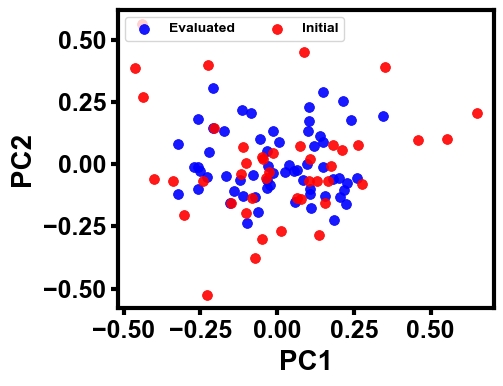

In [24]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='pca1', y='pca2', 
                 markers='*', edgecolor=None, color='blue',
             alpha=0.9, s=50,  label='Evaluated')

sns.scatterplot(data=df_init, x='pca1', y='pca2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50,  label='Initial')

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(ncol=2, loc='upper left')
plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_pca.jpeg', dpi=500)

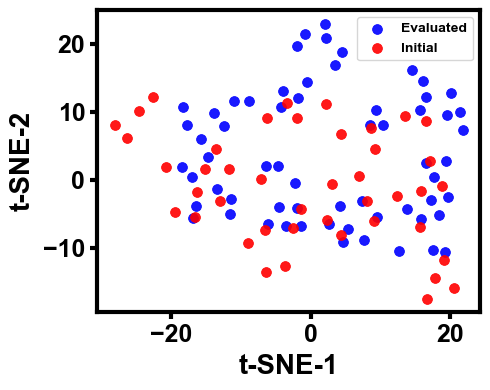

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='tsne1', y='tsne2', 
                 markers='*', edgecolor=None, color='blue',
             alpha=0.9, s=50, label='Evaluated')

sns.scatterplot(data=df_init, x='tsne1', y='tsne2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50, label='Initial')
plt.legend()

ax.set_xlabel('t-SNE-1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('t-SNE-2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_tsne.jpeg', dpi=500)

In [26]:
# PCA Dimension Reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

df ['pca1'] = x_pca[:, 0]
df ['pca2'] = x_pca[:, 1]

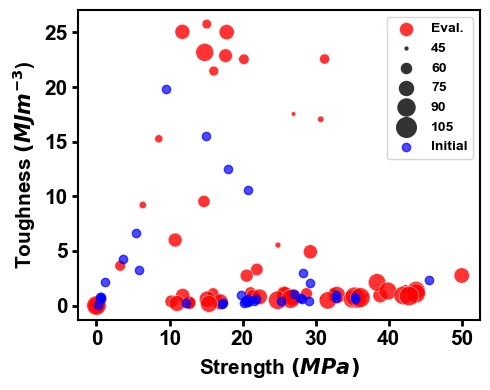

In [27]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot (x='Strength', y='Toughness', size='sample', color='red', sizes=(1, 200), label='Eval.',
                 alpha=.8, palette=["red"], data=df_eval)
plt.scatter (df_init['Tensile_Strength(MPa)'], df_init['Toughness(MJ/m3)'], label='Initial', 
             alpha=0.7, color='blue',)
plt.legend()
#plt.legend(['','','','','', 
 #           'Eval.','Init.'])


ax.set_xlabel('Strength $(MPa)$', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Toughness $({MJ}{m^{-3}}$)', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='15')

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('evaluate_init.png', dpi=500)